- En este ejercicio se quiere predecir los precios de inmuebles (variable ```Sale_Price```)

# Ejercicio 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

# Ejercicio 2

In [30]:
def obtener_categorias_df_a_one_hot_encoding(df):
    tmp = df.copy()
    for columna, tipo_columna in tmp.dtypes.items():
        if tipo_columna == 'object':
            leave_one_out_encoding = pd.get_dummies(tmp[columna], drop_first=True, prefix=columna)
            tmp = tmp.drop(columns=columna)
            tmp = pd.concat([tmp, leave_one_out_encoding], axis=1)

    return tmp

In [31]:
codificada = obtener_categorias_df_a_one_hot_encoding(df)

# Ejercicio 3

In [38]:
X = codificada.drop(columns=['Sale_Price'])
y = codificada['Sale_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

arbol = DecisionTreeRegressor()
arbol.fit(X_train, y_train)

yhat = arbol.predict(X_test)

mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print(f'El MAE del modelo fue: {mae}\n'
      f'El R2 del modelo fue: {r2}')

El MAE del modelo fue: 26154.769389865563
El R2 del modelo fue: 0.7737355142148538


In [41]:
y.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

- Segun la escala de datos, se puede ver que el modelo tiene un mean_squared_error menor a la desviacion estandar del vector objetivo.
- El modelo explica en un 77.4% la varianza del vector objetivo (R2).

Por lo tanto, el modelo presenta un desempeno aceptable.

# Ejercicio 4

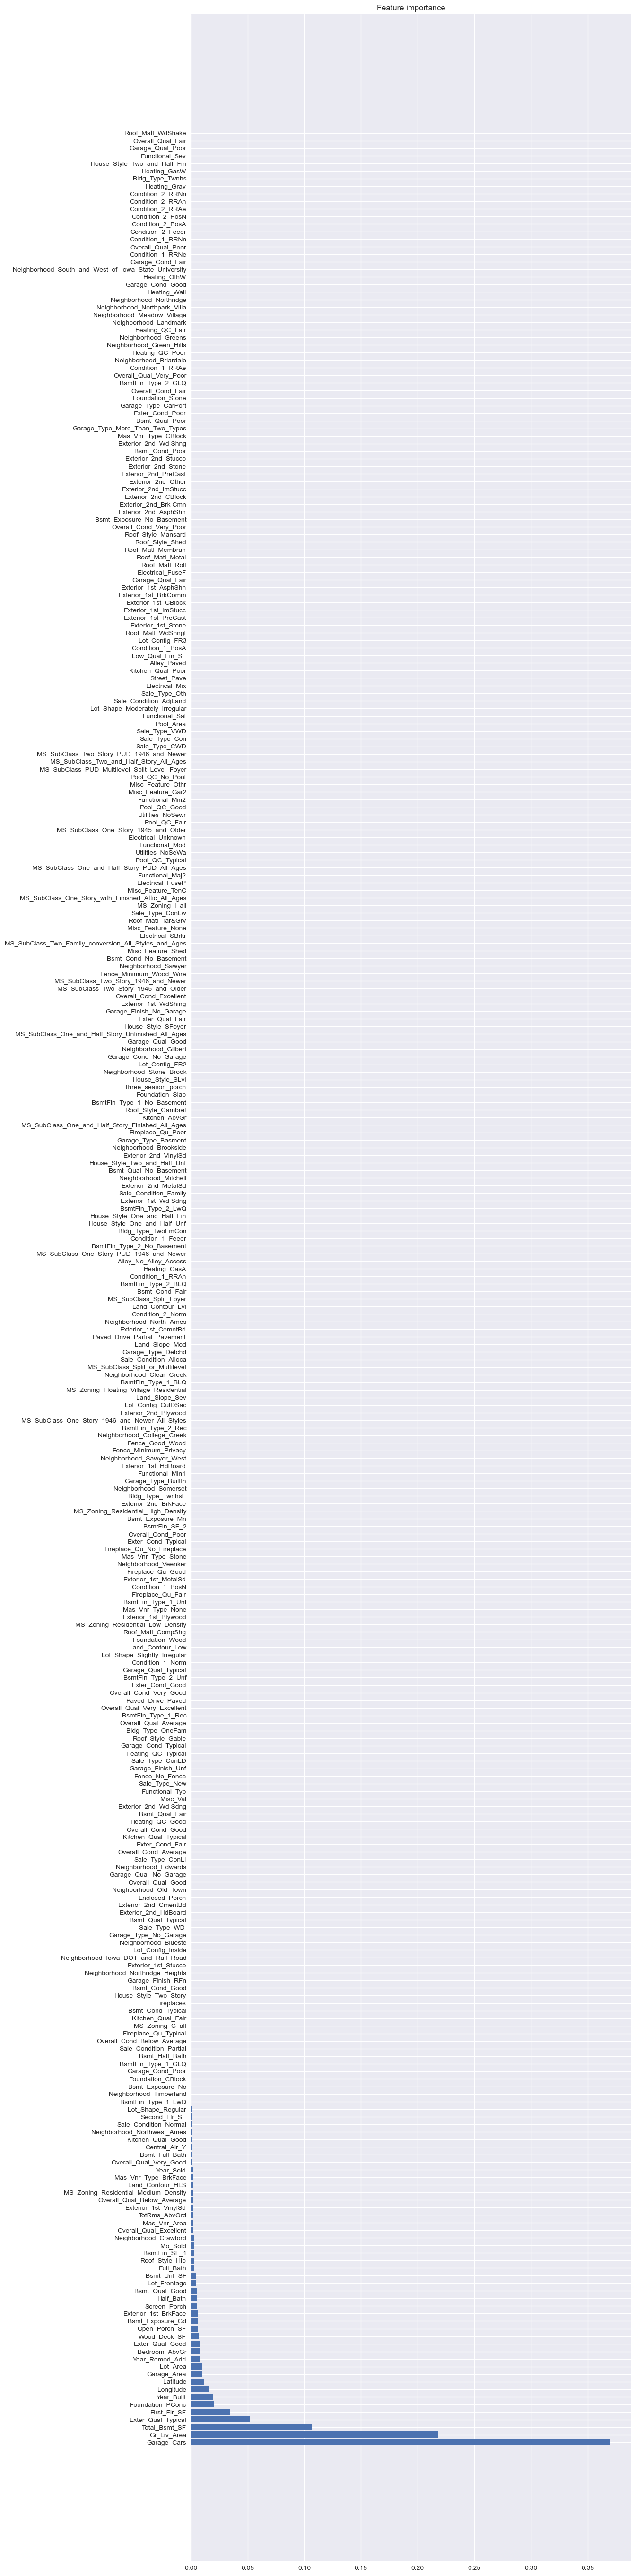

In [53]:
from lec7_graphs import plot_importance

plt.figure(figsize=(12, 70))
plot_importance(arbol, X_train.columns)

- Por lo tanto, las mejores variables que explican al vector objetivo son:

    - Garage_Cars
    - Gr_Liv_Area
    - Total_Bsmt_SF
    - Exter_Qual_Typical
    - First_Flr_SF
    - Foundation_PConc
    - Year_Built
    - Longitude
    - Latitude
    - Garage_Area 

In [54]:
mejores_atributos = ['Garage_Cars', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Exter_Qual_Typical', 
                     'First_Flr_SF', 'Foundation_PConc', 'Year_Built', 'Longitude', 
                     'Latitude', 'Garage_Area']

X_relevantes = codificada[mejores_atributos]
y = codificada['Sale_Price']

# Ejercicio 5

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_relevantes, y, test_size=0.33, random_state=1)

In [64]:
parametros = {
    'max_features': list(range(1, 11)),
    'max_depth': list(range(1, 33))
}

arbol_grilla = GridSearchCV(DecisionTreeRegressor(), param_grid=parametros, cv=5, n_jobs=-1,
                            verbose=5)
arbol_grilla.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=5)

In [69]:
print(f'Los mejores parametros son: {arbol_grilla.best_params_}')
print(f'El mejor desempeno es: {arbol_grilla.best_score_}')

Los mejores parametros son: {'max_depth': 6, 'max_features': 4}
El mejor desempeno es: 0.7571023752101012
